[statinfer.com](https://statinfer.com/)

# Model Selection Cross validation

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

# Data Importing

In [2]:
import pandas as pd
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Credit_Risk_Cleaned/Cleaned_cs_training.csv")

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sr_No                   150000 non-null  int64  
 1   SeriousDlqin2yrs        150000 non-null  int64  
 2   util_new                150000 non-null  float64
 3   age_new                 150000 non-null  int64  
 4   num_30_59_dpd_new       150000 non-null  int64  
 5   DebtRatio_new_ind       150000 non-null  int64  
 6   DebtRatio_new           150000 non-null  float64
 7   MonthlyIncome_ind       150000 non-null  int64  
 8   MonthlyIncome_new       150000 non-null  int64  
 9   Open_Credit_lines_new   150000 non-null  int64  
 10  num_90_dpd_new          150000 non-null  int64  
 11  Real_estate_loans_new   150000 non-null  int64  
 12  num_60_dpd_new          150000 non-null  int64  
 13  NumberOfDependents_new  150000 non-null  int64  
dtypes: float64(2), int64

In [4]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [5]:
model_formula=ols_formula(loans.iloc[:,1:], dependent_var="SeriousDlqin2yrs")
print(model_formula)

SeriousDlqin2yrs ~ util_new + age_new + num_30_59_dpd_new + DebtRatio_new_ind + DebtRatio_new + MonthlyIncome_ind + MonthlyIncome_new + Open_Credit_lines_new + num_90_dpd_new + Real_estate_loans_new + num_60_dpd_new + NumberOfDependents_new


# Sensitivity and Specificity

In [6]:
import statsmodels.formula.api as sm

risk_model=sm.logit(model_formula, data=loans)
results=risk_model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.193444
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149987
Method:                           MLE   Df Model:                           12
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2117
Time:                        08:09:23   Log-Likelihood:                -29017.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.5074      0.080    -43.799      0.000      -3.664      

In [7]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.16607312 0.03823372 0.0952147  0.02527758 0.08018387 0.0839387
 0.02279788 0.01345062 0.02385612 0.07162216]


150000

In [8]:
### Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(loans["SeriousDlqin2yrs"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[138965   1009]
 [  8526   1500]]
Accuracy :  0.9364333333333333
Sensitivity :  0.9927915184248504
Specificity :  0.14961101137043686


## Threshold

In [10]:
###Sensitivity vs Specificity with Different Thresholds
### Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(loans["SeriousDlqin2yrs"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[135485   4489]
 [  6491   3535]]
Accuracy :  0.9268
Sensitivity :  0.9679297583836999
Specificity :  0.3525832834629962


In [11]:
###Sensitivity vs Specificity with Different Thresholds
### Converting predicted values into classes using new threshold
threshold=0.8
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(loans["SeriousDlqin2yrs"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[139625    349]
 [  9400    626]]
Accuracy :  0.9350066666666667
Sensitivity :  0.9975066798119651
Specificity :  0.06243766207859565


# Precision, Recall and F1 Score

In [12]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(loans["SeriousDlqin2yrs"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )



Confusion Matrix : 
 [[138965   1009]
 [  8526   1500]]
Accuracy :  0.9364333333333333
Precision_Class0 :  0.9421930829677743
Recall_Class0 :  0.9927915184248504
F1_Class0 :  0.9668307446123875
Precision_Class1 :  0.5978477481068155
Recall_Class1 :  0.14961101137043686
F1_Class1 :  0.23932987634623054


In [13]:
from sklearn.metrics import classification_report
print(classification_report(loans["SeriousDlqin2yrs"],predicted_class1))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    139974
           1       0.60      0.15      0.24     10026

    accuracy                           0.94    150000
   macro avg       0.77      0.57      0.60    150000
weighted avg       0.92      0.94      0.92    150000



# ROC

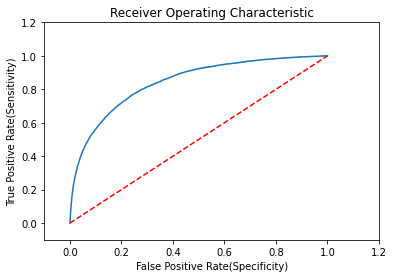

In [14]:
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = loans["SeriousDlqin2yrs"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()


# AUC

In [15]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8419745700913577

# Handling Class Imbalance

In [16]:
print("Actual Data :", loans.shape)

#Frequency count on target column
freq=loans['SeriousDlqin2yrs'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_risk_class0 = loans[loans['SeriousDlqin2yrs'] == 0]
credit_risk_class1 = loans[loans['SeriousDlqin2yrs'] == 1]

print("Class0 Actual :", credit_risk_class0.shape)
print("Class1 Actual  :", credit_risk_class1.shape)


Actual Data : (150000, 14)
0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64
0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64
Class0 Actual : (139974, 14)
Class1 Actual  : (10026, 14)


## Creating Balanced Data

In [17]:
##Undersampling of class-0
## Consider half of class-0
credit_risk_class0_under = credit_risk_class0.sample(int(0.5*len(credit_risk_class0)))
print("Class0 Undersample :", credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
credit_risk_class1_over = credit_risk_class1.sample(4*len(credit_risk_class1),replace=True)
print("Class1 Oversample :", credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
credit_risk_balanced=pd.concat([credit_risk_class0_under,credit_risk_class1_over])
print("Final Balannced Data :", credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
freq=credit_risk_balanced['SeriousDlqin2yrs'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (69987, 14)
Class1 Oversample : (40104, 14)
Final Balannced Data : (110091, 14)
0    69987
1    40104
Name: SeriousDlqin2yrs, dtype: int64
0    63.571954
1    36.428046
Name: SeriousDlqin2yrs, dtype: float64


## Model with balanced data

In [18]:
model_formula="SeriousDlqin2yrs ~ util_new + age_new + num_30_59_dpd_new + DebtRatio_new_ind + DebtRatio_new + MonthlyIncome_ind + MonthlyIncome_new + Open_Credit_lines_new + num_90_dpd_new + Real_estate_loans_new + num_60_dpd_new + NumberOfDependents_new"

In [19]:
risk_model=sm.logit(model_formula, data=credit_risk_balanced)
results=risk_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.474023
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               110091
Model:                          Logit   Df Residuals:                   110078
Method:                           MLE   Df Model:                           12
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2772
Time:                        08:09:26   Log-Likelihood:                -52186.
converged:                       True   LL-Null:                       -72202.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.6434      0.052    -31.332      0.000      -1.746      

## Updated Sensitivity and Specificity

In [20]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(credit_risk_balanced["SeriousDlqin2yrs"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[63639  6348]
 [17692 22412]]
Accuracy :  0.7816351927042174
Sensitivity :  0.9092974409533199
Specificity :  0.5588469978057051


## Updated Precision, Recall and F1-Score

In [21]:
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )



Accuracy :  0.7816351927042174
Precision_Class0 :  0.782469169197477
Recall_Class0 :  0.9092974409533199
F1_Class0 :  0.8411292774157734
Precision_Class1 :  0.7792767732962448
Recall_Class1 :  0.5588469978057051
F1_Class1 :  0.6509061338289962


In [22]:
from sklearn.metrics import classification_report
print(classification_report(credit_risk_balanced["SeriousDlqin2yrs"],predicted_class1))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     69987
           1       0.78      0.56      0.65     40104

    accuracy                           0.78    110091
   macro avg       0.78      0.73      0.75    110091
weighted avg       0.78      0.78      0.77    110091




# Model with huge Variance - Overfitted model

In [23]:
Fiber_df=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Fiberbits/Fiberbits.csv")

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree

features = list(Fiber_df.drop(['active_cust'],1).columns) 
X = np.array(Fiber_df[features])
y = np.array(Fiber_df['active_cust'])

#Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)
#Build the best model(1% error) model on training data.
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

train_acc= tree_model.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= tree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

train_accuracy 0.997225
test_accuracy 0.8446


# Model with huge Bias - underfitted model

In [25]:
tree_model = tree.DecisionTreeClassifier(max_depth=1)
tree_model.fit(X_train,y_train)

train_acc= tree_model.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= tree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

train_accuracy 0.68355
test_accuracy 0.68075


# Holdout data Cross validation

In [26]:
tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train,y_train)

train_acc= tree_model.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= tree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

train_accuracy 0.7524125
test_accuracy 0.75085


# K- Fold cross validation

In [27]:
X = np.array(Fiber_df[features])
y = np.array(Fiber_df['active_cust'])

tree_KF = tree.DecisionTreeClassifier(max_depth=30)

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(tree_KF,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.7529 0.7017 0.6096 0.7518 0.7389 0.7975 0.7653 0.6535 0.8437 0.6843]
Avg K-Fold Accuracy 0.7299200000000001
